# Lab 2.10.1 Linear Eq - Attitude
Obtain the attitudes dataset Download attitudes dataset. Here, the first variable, attitude, represents the amount of positive attitude of the students who have taken an examination and the score represents the marks scored by the participants in the examination.<p>
Express the relationship between the predictor (attitude) and the outcome (score) variables using a linear equation.<p>
Using whatever means necessary (maybe first by hand and then using a tool), solve the equation.<p>
Find your predictions for a score for the following values of attitude: 60, 63, 78, 80.<p>

In [9]:
import pandas as pd
df = pd.read_csv('LAB 2.10.1_ attitude.csv').reset_index()
df = df[['Attitude', 'Score']]
display(df)

,Attitude,Score
0,65,129
1,67,126
2,68,143
3,70,156
4,71,161
5,72,158
6,72,168
7,73,166
8,73,182
9,75,201


The basic eqaution to represent this relationship is:<p>
    $y=β_0 + β_1x + ϵ$<p>

We can solve by Ordinary Least Squares:<p>
$\bar{x} = \frac{\sum_{i=1}^{n} x_i}{n} \quad (\text{Mean of attitude})$

$\bar{y} = \frac{\sum_{i=1}^{n} y_i}{n} \quad (\text{Mean of score})$
    
$\beta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2} \quad (\text{slope of}  \beta_1)$

$\beta_0 = \bar{y} - \beta_1 \bar{x} \quad (\text{y-intercept of}  \beta_0)$

$\epsilon \quad \text{is the error}$<p>
    
## Manual Calculation

In [26]:
# First get the mean of x and y
x_mean = df['Attitude'].mean()
y_mean = df['Score'].mean()

# Iterate over the data frame and calculate the slope
slope_denom, slope_numer = 0, 0
for i in range(len(df)):
    slope_denom += (df['Attitude'].iloc[i]-x_mean)*(df['Score'].iloc[i]-y_mean)
    slope_numer += (df['Attitude'].iloc[i]-x_mean)**2    
slope = slope_denom/slope_numer

# Calculate the y-intercept
y_intercept = y_mean-slope*x_mean

print(f'x_mean {x_mean:.4f}')
print(f'y_mean {y_mean:.5f}')
print(f'slope {slope:.4f}')
print(f'y_intercept {y_intercept:.4f}')

x_mean 70.6000
y_mean 159.00000
slope 6.9329
y_intercept -330.4606


In [32]:
# Test out formula
predicted = []
for i in range(len(df)):
    x = df['Attitude'].iloc[i]
    y = y_intercept + slope*x
    predicted.append(y)
    epsilon = y - df['Score'].iloc[i]
    print(f'With x={x}, the predicted y is {y:.3f} with an error of {epsilon:.3f}')
df['predicted'] = predicted

With x=65, the predicted y is 120.176 with an error of -8.824
With x=67, the predicted y is 134.042 with an error of 8.042
With x=68, the predicted y is 140.975 with an error of -2.025
With x=70, the predicted y is 154.840 with an error of -1.160
With x=71, the predicted y is 161.773 with an error of 0.773
With x=72, the predicted y is 168.706 with an error of 10.706
With x=72, the predicted y is 168.706 with an error of 0.706
With x=73, the predicted y is 175.639 with an error of 9.639
With x=73, the predicted y is 175.639 with an error of -6.361
With x=75, the predicted y is 189.505 with an error of -11.495


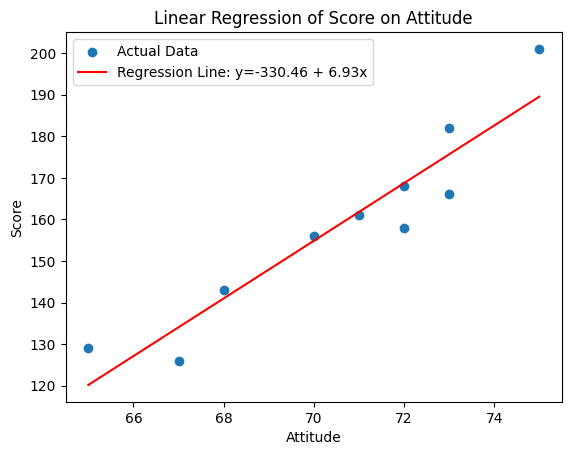

In [39]:
import matplotlib.pyplot as plt
import numpy as np

x_range = np.linspace(df['Attitude'].min(), df['Attitude'].max(), 10)
y_predicted = y_intercept + slope * x_range

# Plot the scatter plot of the actual data points
plt.scatter(df['Attitude'], df['Score'], label='Actual Data')

# Plot the regression line
plt.plot(x_range, y_predicted, color='red', label=f'Regression Line: y={y_intercept:.2f} + {slope:.2f}x')

# Add labels and title
plt.xlabel('Attitude')
plt.ylabel('Score')
plt.title('Linear Regression of Score on Attitude')
plt.legend()
plt.show()

## Use Statsmodels to calculate OLS

In [38]:
import statsmodels.formula.api as smf

# Fit the linear regression model using statsmodels (to get slope and intercept)
model = smf.ols('Score ~ Attitude', data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     62.78
Date:                Sat, 12 Apr 2025   Prob (F-statistic):           4.68e-05
Time:                        19:41:11   Log-Likelihood:                -34.033
No. Observations:                  10   AIC:                             72.07
Df Residuals:                       8   BIC:                             72.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -330.4606     61.829     -5.345      0.0

S:\code\pyinv\py312_venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


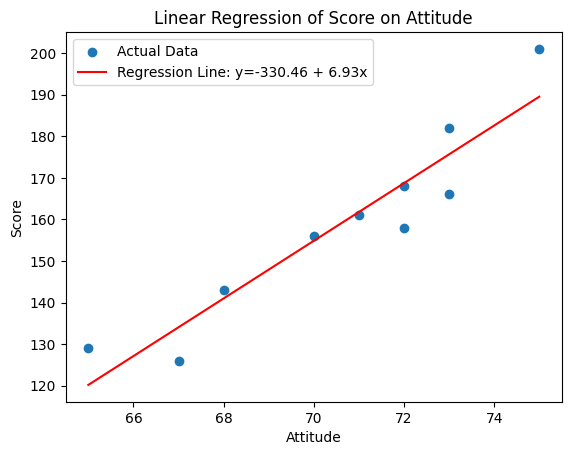

In [40]:
slope = results.params['Attitude']
y_intercept = results.params['Intercept']

# Generate the regression line points
x_range = np.linspace(df['Attitude'].min(), df['Attitude'].max(), 20)
y_predicted = y_intercept + slope * x_range

# Plot the scatter plot of the actual data points
plt.scatter(df['Attitude'], df['Score'], label='Actual Data')

# Plot the regression line
plt.plot(x_range, y_predicted, color='red', label=f'Regression Line: y={y_intercept:.2f} + {slope:.2f}x')

# Add labels and title
plt.xlabel('Attitude')
plt.ylabel('Score')
plt.title('Linear Regression of Score on Attitude')
plt.legend()
plt.show()